<a href="https://colab.research.google.com/gist/gowatana/1fc66e48db015732e3a88870af2ac67b/demo-tensorflow-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考：初心者のための TensorFlow 2.0 入門
* https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja


# 1. 画像判別モデルの作成（手動実行の例）

TensorFlowのPythonライブラリをインポート

In [ ]:
import tensorflow as tf

TensorFlowのバージョン確認

In [2]:
print(tf.__version__)

2.5.3


## 1-1. サンプル データセット（MNIST）をダウンロード

In [3]:
mnist = tf.keras.datasets.mnist

## 1-2. 学習にむけて、データの前処理を実施

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 2s 0us/step


## 1-3. モデルの学習と保存

モデルをのニューラル ネットワークを定義

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

2024-02-20 14:52:53.027947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-20 14:52:53.028029: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-20 14:52:53.028073: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (note-01-0): /proc/driver/nvidia/version does not exist
2024-02-20 14:52:53.028506: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


モデルを作成（コンパイル）

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

モデルの学習（5回繰り返す）と保存

In [7]:
model.fit(x_train, y_train, epochs=5)
model.save('./mnist_saved_model')

2024-02-20 14:53:04.302714: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2024-02-20 14:53:04.775285: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-02-20 14:53:04.776059: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2111995000 Hz


Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2993 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1456 - accuracy: 0.9556
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1093 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0898 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0752 - accuracy: 0.9761


2024-02-20 14:55:28.403120: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./mnist_saved_model/assets


保存されたモデルの確認（Linuxのlsコマンド）

In [8]:
!ls -l ./mnist_saved_model

total 108
drwxr-sr-x 2 jovyan 1337  4096 Feb 20 14:55 assets
-rw-r--r-- 1 jovyan 1337  7913 Feb 20 14:55 keras_metadata.pb
-rw-r--r-- 1 jovyan 1337 90945 Feb 20 14:55 saved_model.pb
drwxr-sr-x 2 jovyan 1337  4096 Feb 20 14:55 variables


## 1-4. モデルのテスト

テスト用のデータセットを利用して、作成されたモデルのテストを実施

In [9]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0777 - accuracy: 0.9767


[0.07765280455350876, 0.9767000079154968]

# ここまでのPythonコードのまとめ
ここまでの手順をまとめて、ひとつのコードとして実行する。

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test, verbose=2)

# 2. モデルによる推論の実行（MNIST画像の判別）

※ただし、トレーニングで利用したMNIST画像を流用しているため、ほぼ確実に正解します。

## 2-1. 推論用データの用意

MNISTデータセットから10件を、画像ファイル（PNG）として保存

In [10]:
from PIL import Image
import tensorflow as tf
import os

dir_path = 'data/images'

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 保存先のディレクトリを作成
os.makedirs(dir_path, exist_ok=True)

# 画像の保存
for i in range(10):
    img = Image.fromarray(x_train[i])
    img.save(os.path.join(dir_path, f'test_{i}.png'))

In [ ]:
10件の画像ファイルが保存されるている

In [11]:
!ls data/images/

test_0.png  test_2.png	test_4.png  test_6.png	test_8.png
test_1.png  test_3.png	test_5.png  test_7.png	test_9.png


画像の表示確認

1行目でファイルを指定する。

* 例： test_0.png → 「5」

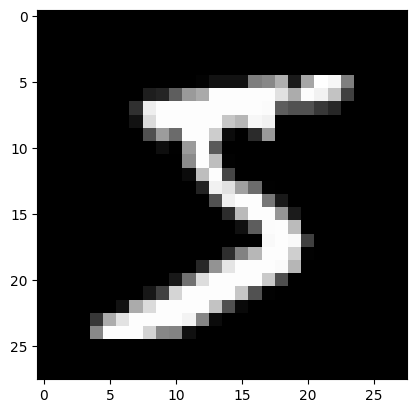

In [12]:
img_file_name = 'data/images/test_0.png'

import matplotlib.pyplot as plt
from PIL import Image
img = Image.open(img_file_name)
plt.imshow(img, cmap='gray')  # 画像がグレースケールの場合は cmap='gray' を使用
plt.show()

## 2-2. モデルによる推論の実行

生成したモデルで、直前に表示した画像に書かれている数字を判別します。

※直前のコード実行で、img_file_name = 'data/images/test_0.png' を指定してあります。

In [13]:
from PIL import Image
import numpy as np
import tensorflow as tf

# 画像の読み込み
img = Image.open(img_file_name)

# 前処理として、モデルの入力形式に合わせるために
# 画像のグレースケール変換、サイズ変更などを行う
img = img.convert('L').resize((28, 28))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28)

# 保存されているモデルのロード
model = tf.keras.models.load_model('./mnist_saved_model')

# 推論の実行
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print("Number:", predicted_class)

Number: [5]
